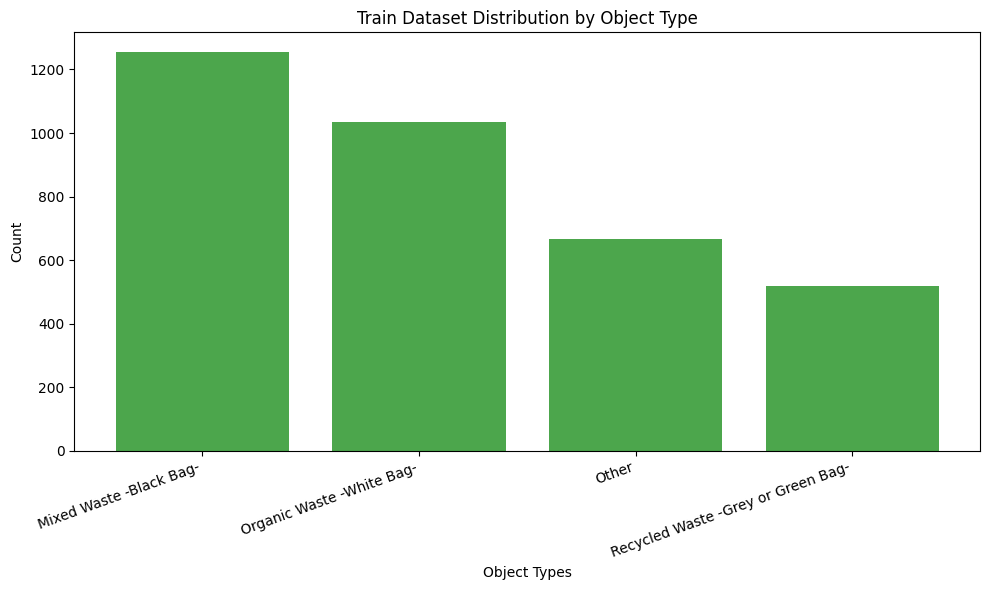

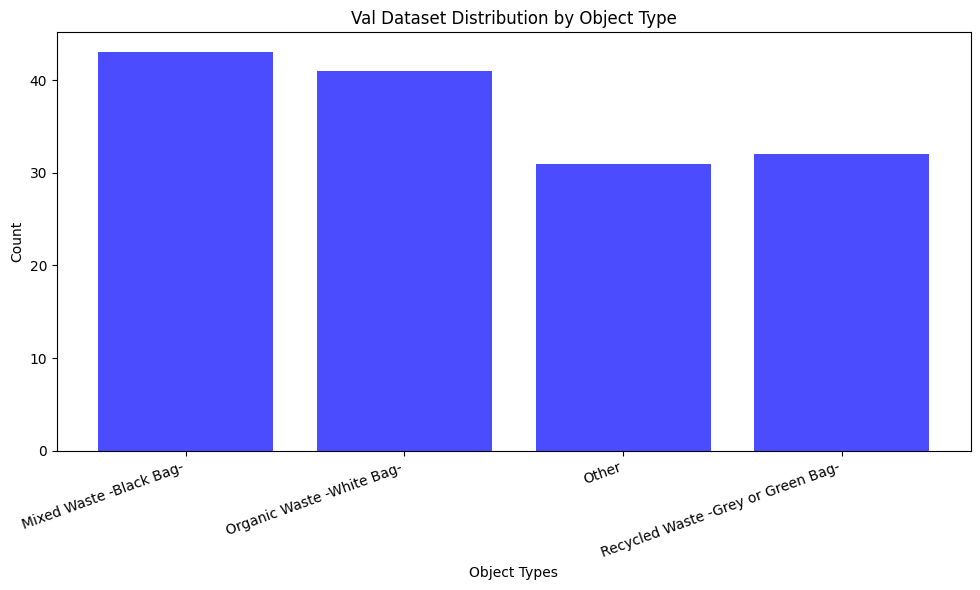

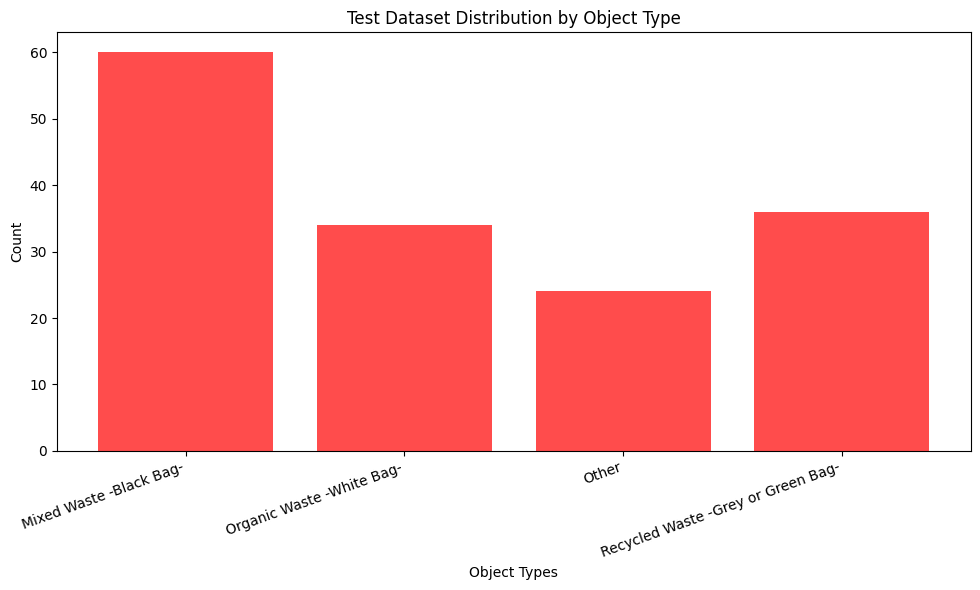

In [14]:
import os
import yaml
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load the YAML file
yaml_path = "data.yaml"  # Replace with the actual path to your .yaml file
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

# Extract dataset paths and categories
dataset_dirs = {
    'train': 'train/labels',
    'val': 'valid/labels',
    'test': 'test/labels'
}

categories = config['names']

# Predefined colors for each dataset
colors = {
    'train': 'green',
    'val': 'blue',
    'test': 'red',
}

# Initialize a counter for each dataset
data_counts = {key: Counter() for key in dataset_dirs.keys()}

# Count objects in each dataset
for split, path in dataset_dirs.items():
    if os.path.exists(path):
        for label_file in os.listdir(path):
            with open(os.path.join(path, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])  # Extract class ID from each line
                    data_counts[split][class_id] += 1
    else:
        print(f"Path {path} does not exist!")

# Generate separate histograms for train, val, and test
for split, counts in data_counts.items():
    # Extract counts for the current dataset
    counts_list = [counts[i] for i in range(len(categories))]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(len(categories)), counts_list, color=colors[split], alpha=0.7)
    plt.xlabel('Object Types')
    plt.ylabel('Count')
    plt.title(f'{split.capitalize()} Dataset Distribution by Object Type')
    plt.xticks(np.arange(len(categories)), categories, rotation=20, ha='right')
    plt.tight_layout()
    plt.show()
